In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import awkward as ak
import mplhep as hep
import vector
hep.style.use("CMS")

In [2]:
data_directory = "./"
file_name = "breit_output.root"
with ur.open("{file}:jets".format(file=data_directory+file_name)) as out:
    jets = out.arrays(["eta", "px", "py", "pz", "E", "pT", "phi"])
    print("Number of events:",out.num_entries)
with ur.open("{file}:event".format(file=data_directory+file_name)) as event:
    event_info = event.arrays(["Q2", "weight"])
    print("Number of events:",event.num_entries)

Number of events: 50000
Number of events: 50000


In [3]:
Q = np.sqrt(event_info["Q2"])
n = vector.obj(px=0, py = 0, pz=1, E=1)
z_jet =  []
for i, (px_event, py_event, pz_event, E_event) in enumerate(zip(jets["px"], jets["py"], jets["pz"], jets["E"])):
    event_z_jet = []
    for px, py, pz, E in zip(px_event, py_event, pz_event, E_event):
        jet_vec = vector.obj(px=px, py=py, pz=pz, E=E)
        z = n.dot(jet_vec) / Q[i]
        event_z_jet.append(z)
    z_jet.append(event_z_jet)
z_jet = ak.Array(z_jet)
weights = event_info["weight"]
weights = np.repeat(weights, ak.num(z_jet, axis=1))
eta_jet = np.asarray(ak.flatten(jets["eta"]))

Text(0.5, 1.0, 'Jets with z>0.2, Centauro R0 = 0.8')

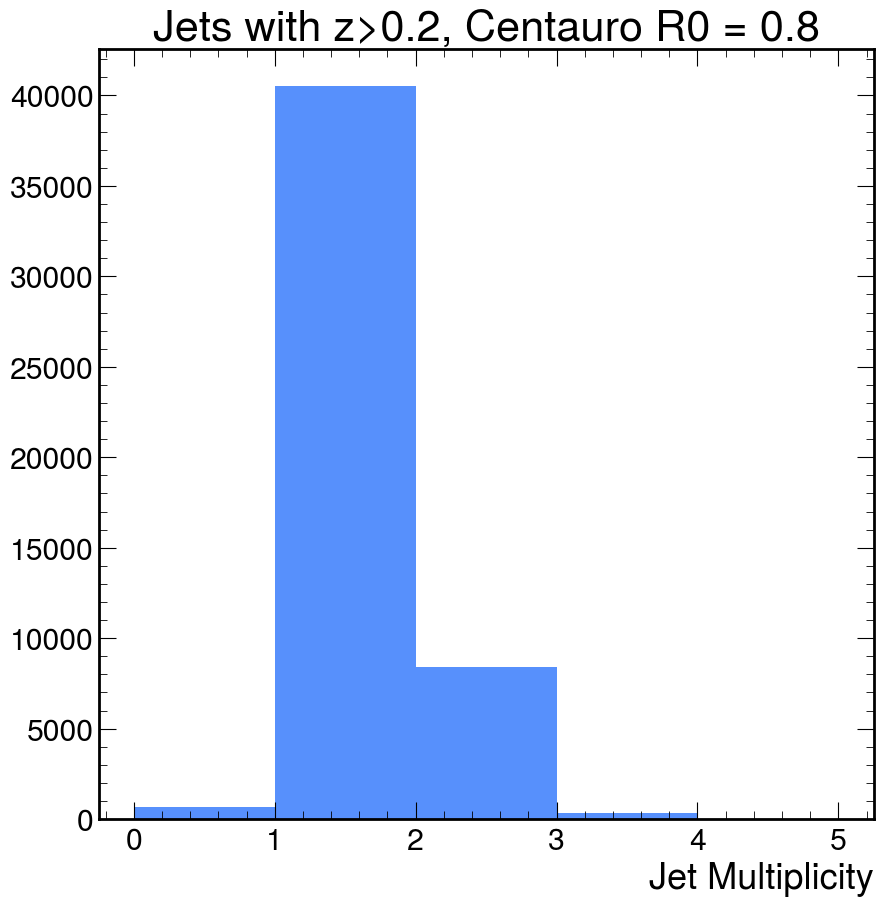

In [4]:
z_mask_unflattened = z_jet>0.2

mult = ak.count(z_jet[z_mask_unflattened], axis=1)
plt.hist(mult, bins=5, range=(0,5))
plt.xlabel("Jet Multiplicity")
plt.title("Jets with z>0.2, Centauro R0 = 0.8")

In [5]:
z_mask = ak.flatten(z_jet)>0.2

Text(0.5, 1.0, 'Jets with z>0.2, Centauro R0 = 0.8')

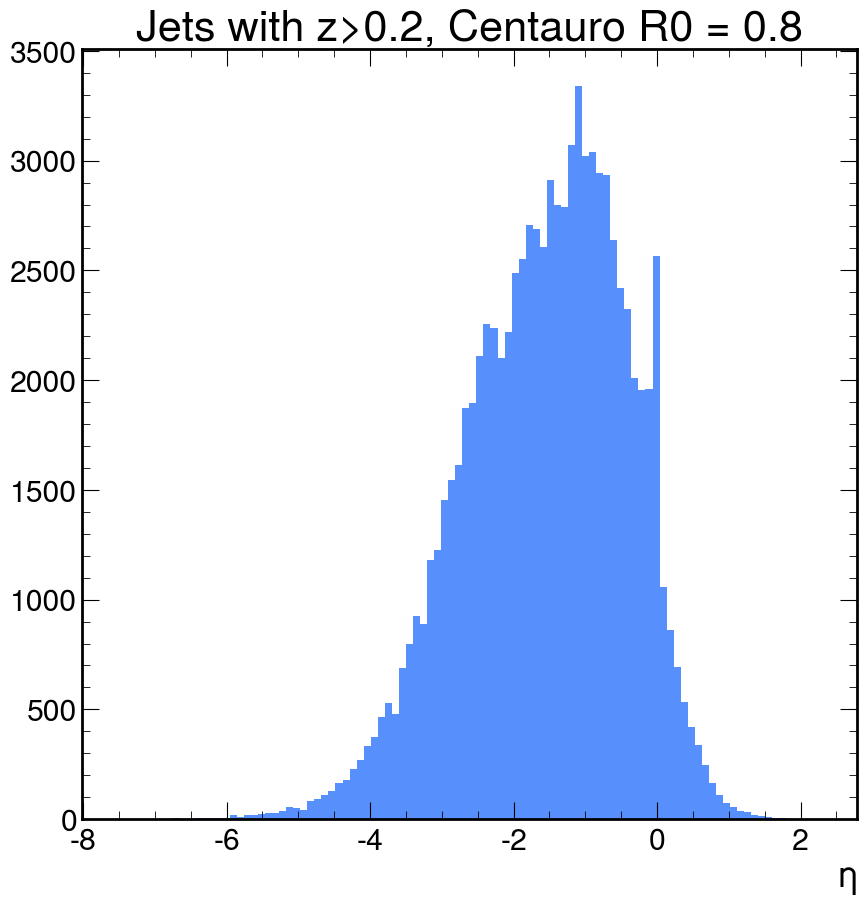

In [6]:
plt.hist(ak.flatten(jets["eta"])[z_mask], weights = weights[z_mask], bins=100)
plt.xlabel("$\eta$")
plt.title("Jets with z>0.2, Centauro R0 = 0.8")

Text(0.5, 1.0, 'Jets with z>0.2, Centauro R0 = 0.8')

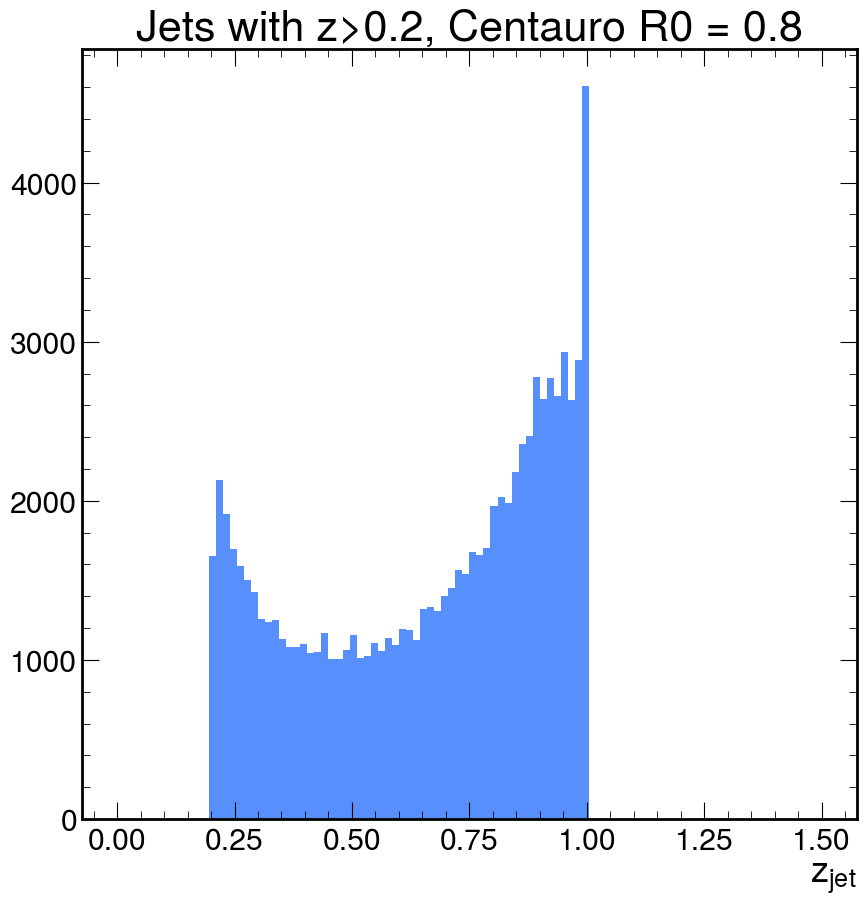

In [7]:
plt.hist(ak.flatten(z_jet)[z_mask], weights = weights[z_mask], bins = 100, range=(0, 1.5))
plt.xlabel("$z_{jet}$")
plt.title("Jets with z>0.2, Centauro R0 = 0.8")

Text(0.5, 1.0, 'Jets with z>0.2, Centauro R0 = 0.8')

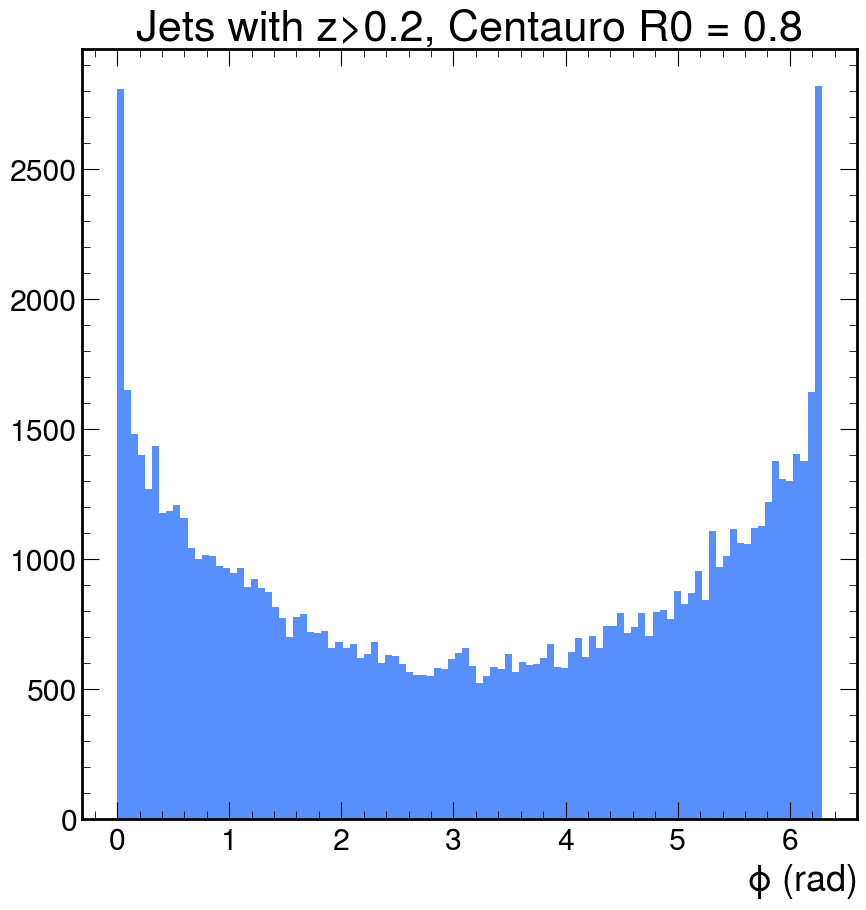

In [8]:
plt.hist(ak.flatten(jets["phi"])[z_mask], weights = weights[z_mask], bins=100)
plt.xlabel("$\phi$ (rad)")
plt.title("Jets with z>0.2, Centauro R0 = 0.8")

Text(0.5, 1.0, 'Centauro R0 = 0.8')

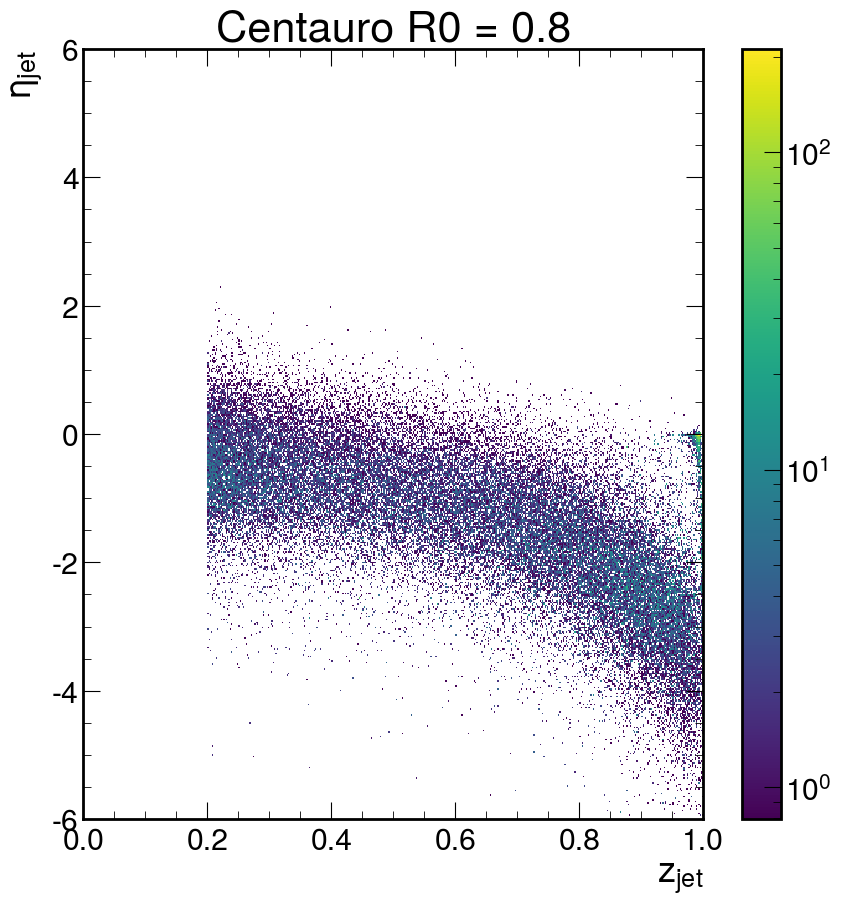

In [9]:
plt.hist2d(np.asarray(ak.flatten(z_jet)[z_mask]), np.asarray(ak.flatten(jets["eta"])[z_mask]), weights = np.asarray(weights[z_mask]), bins=(500,500), range=[(0, 1.0), (-6,6)], norm = colors.LogNorm())
plt.xlabel("$z_{jet}$")
plt.ylabel("$\eta_{jet}$")
plt.colorbar()
plt.title("Centauro R0 = 0.8")